In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import data 

In [7]:
df_business = pd.read_csv('business.csv')
df_clean = pd.read_csv('clean_dataset.csv')
df_economy = pd.read_csv('economy.csv')

In [9]:
# Select the 'stop' column and clean it
# There are few nois
df_business['stop'] = df_business['stop'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 1. Remove the commas from the 'price' column
df_business['price'] = df_business['price'].str.replace(',', '', regex=False)
# 2. Convert the cleaned column from text to integer numbers
df_business['price'] = df_business['price'].astype(int)

In [11]:
print(df_business.info())
df_business.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        93487 non-null  object 
 1   airline     93487 non-null  object 
 2   ch_code     93487 non-null  object 
 3   num_code    93487 non-null  int64  
 4   dep_time    93487 non-null  float64
 5   from        93487 non-null  object 
 6   time_taken  93487 non-null  object 
 7   stop        93487 non-null  object 
 8   arr_time    93487 non-null  float64
 9   to          93487 non-null  object 
 10  price       93487 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 7.8+ MB
None


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18.00,Delhi,02h 00m,non-stop,20.00,Mumbai,25612
1,11-02-2022,Air India,AI,624,19.00,Delhi,02h 15m,non-stop,21.15,Mumbai,25612
2,11-02-2022,Air India,AI,531,20.00,Delhi,24h 45m,1-stop,20.45,Mumbai,42220
3,11-02-2022,Air India,AI,839,21.25,Delhi,26h 30m,1-stop,23.55,Mumbai,44450
4,11-02-2022,Air India,AI,544,17.15,Delhi,06h 40m,1-stop,23.55,Mumbai,46690


In [13]:
df_economy['price'] = df_economy['price'].replace(r'\s+', '', regex=True).str.strip()

df_economy['price'] = df_economy['price'].str.replace(',', '',regex = False)
df_economy['price'] = df_economy['price'].astype(int)

In [15]:
print(df_economy.info())
df_economy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        206774 non-null  object 
 1   airline     206774 non-null  object 
 2   ch_code     206774 non-null  object 
 3   num_code    206774 non-null  int64  
 4   dep_time    206774 non-null  float64
 5   from        206774 non-null  object 
 6   time_taken  206774 non-null  object 
 7   stop        206774 non-null  object 
 8   arr_time    206774 non-null  float64
 9   to          206774 non-null  object 
 10  price       206774 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 17.4+ MB
None


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18.55,Delhi,02h 10m,non-stop,21.05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,8157,6.20,Delhi,02h 20m,non-stop,8.40,Mumbai,5953
2,11-02-2022,AirAsia,I5,764,4.25,Delhi,02h 10m,non-stop,6.35,Mumbai,5956
3,11-02-2022,Vistara,UK,995,10.20,Delhi,02h 15m,non-stop,12.35,Mumbai,5955
4,11-02-2022,Vistara,UK,963,8.50,Delhi,02h 20m,non-stop,11.10,Mumbai,5955


In [17]:
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [21]:
value = ['source_city','destination_city']
routes = df_clean[value].value_counts()
routes.head()

source_city  destination_city
Delhi        Mumbai              15289
Mumbai       Delhi               14809
Delhi        Bangalore           14012
Bangalore    Delhi               13756
             Mumbai              12939
Name: count, dtype: int64

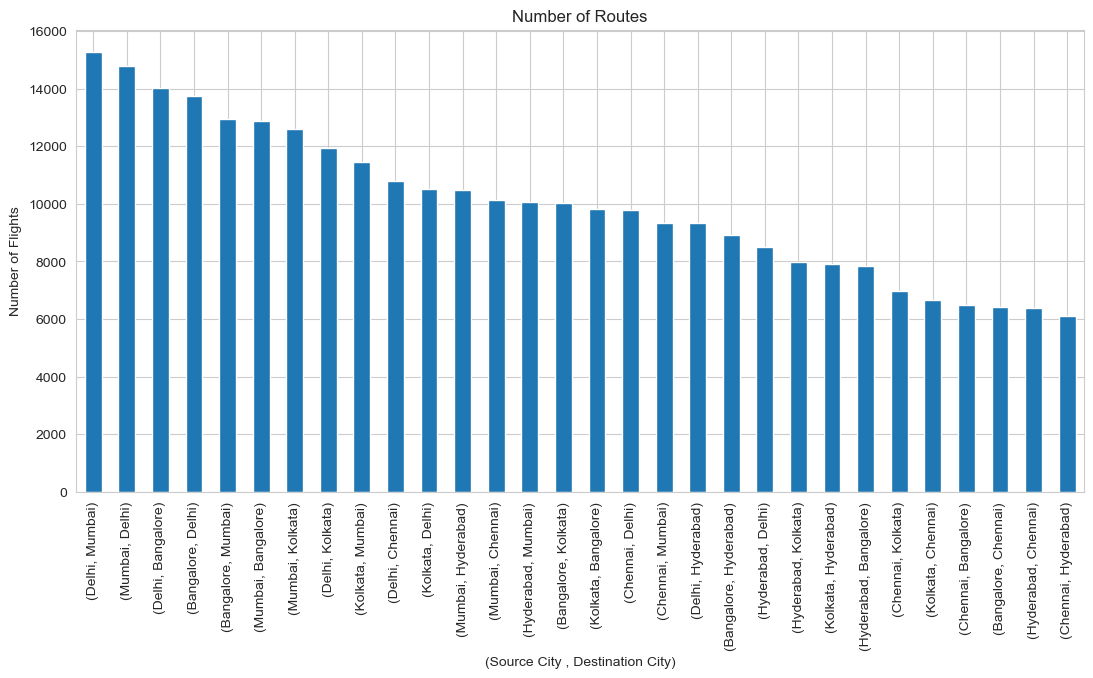

In [139]:
sns.set_style('whitegrid')
plt.figure(figsize=(13,6))
routes.plot(kind='bar')
plt.title('Number of Routes')
plt.ylabel('Number of Flights')
plt.xlabel('(Source City , Destination City)')
plt.show()

In [95]:
airline_revenue = df_clean.groupby('airline')['price'].sum().sort_values(ascending = False)
airline_revenue

airline
Vistara      3886470735
Air_India    1901529790
Indigo        229580207
GO_FIRST      130973972
AirAsia        65858089
SpiceJet       55681482
Name: price, dtype: int64

In [129]:
total_revenue = airline_revenue.sum()
revenue_percentage = (airline_revenue/total_revenue)*100
revenue_percentage

airline
Vistara      61.984247
Air_India    30.326973
Indigo        3.661511
GO_FIRST      2.088868
AirAsia       1.050352
SpiceJet      0.888049
Name: price, dtype: float64

/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_6138/2645823645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=revenue_percentage.index, y=revenue_percentage.values, palette='viridis')


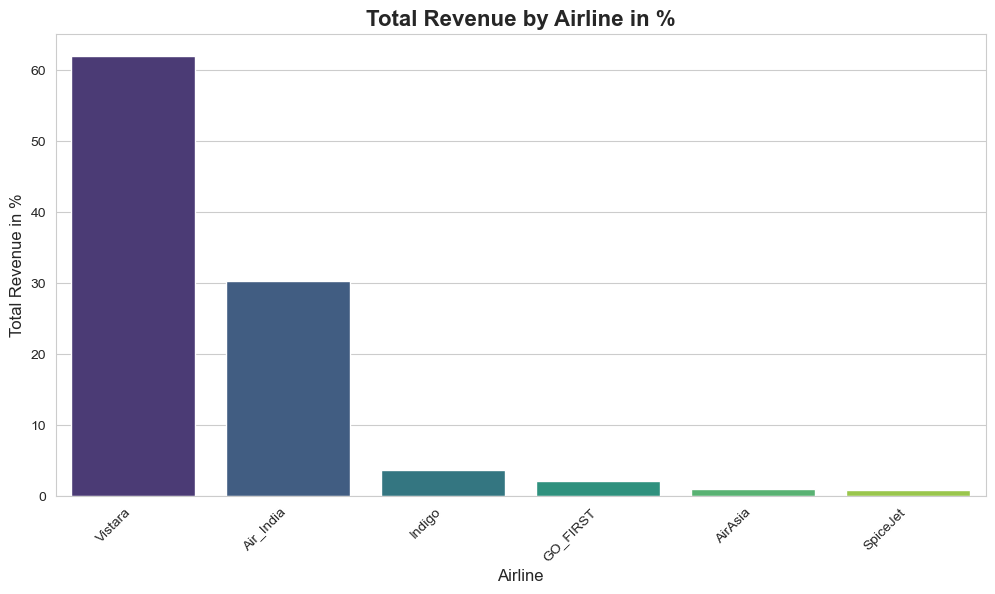

In [137]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6)) 

barplot = sns.barplot(x=revenue_percentage.index, y=revenue_percentage.values, palette='viridis')

plt.title('Total Revenue by Airline in %', fontsize=16, weight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Total Revenue in %', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()